<a href="https://colab.research.google.com/github/anushka-amar/Dog-Vision/blob/master/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!unzip "drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "drive/MyDrive/Dog Vision/"

## 🐶 End-to-end multi-class Dog Breed Clssification
This notebook builds an end-to-end multi-class img classifier
using TensorFlow 2.0 and TensorFlow Hub.


## 1. problem
identifying the breed of dog, given the image.
taking the photo of dog and identifying the dog breed.

## 2. Data
The data we're using is from kaggle's dog breed identification
competition.
https://www.kaggle.com/competitions/dog-breed-identification/data

## 3. Evaluation
The evaluation is a file w prediction prob. for each dog breed of 
each test image.
https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

## 4. Features
some information about the data:
* We're dealing with images (unstructured data) so it's probably best 
if we use deep/transfer learning.
*There are 120 breeds of dogs(this means there are 120 different classes).
*There are around 10,000+ images in the training set
(these imgs have labels)
*There are around 10,000+ images in the test set
(these imgs have no labels because we have to predict them).

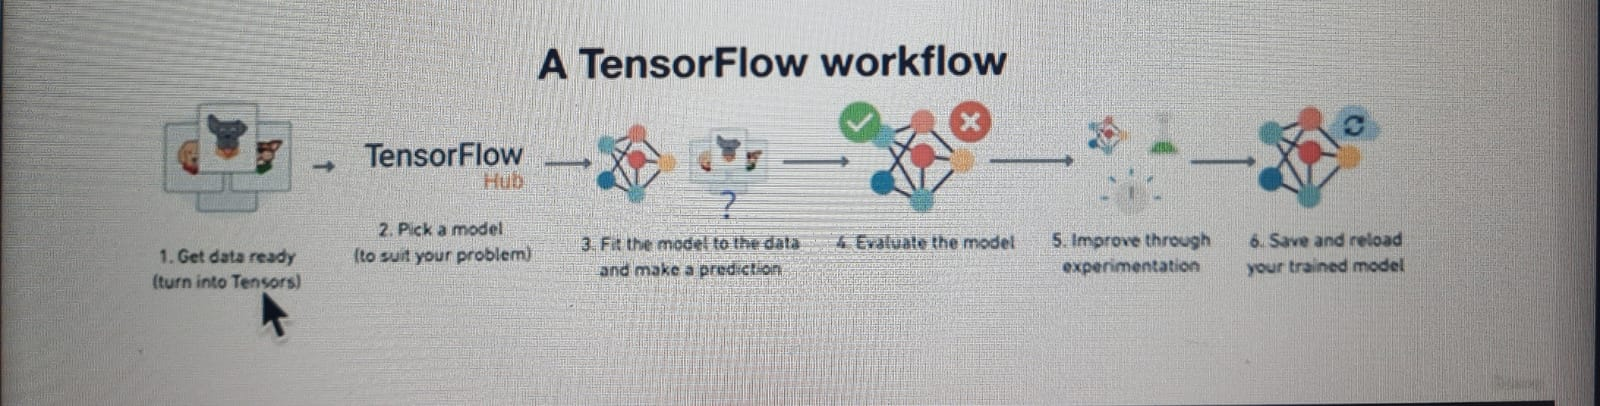

### Get our workspace ready

* Import tensor flow 2.x
* Import tensor flow hub
* Make sure we're using a GPU
`TensorFlow Hub is an open repository and library for reusable machine learning. The tfhub. dev repository provides many pre-trained models: text embeddings, image classification models, TF. js/TFLite models and much more.`

**TensorFlow** is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks


**TensorFlow** Hub is a repository of trained machine learning models ready for fine-tuning and deployable anywhere.

In [2]:
# Importing necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF hub version:", hub.__version__) 

#check for GPU availability
print("GPU", "available (YES!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version: 2.12.0
TF hub version: 0.13.0
GPU available (YES!!!!!)


## Getting our data ready (turning into Tensors)
with all ML models, our data has to be in numerical format. So that's what we'll be doing first. Turning our images into tensors

Let's start by accessing our data and checking out labels


Labels contains: breed and id

In [3]:
#checkout the labels of our data
#A DataFrame is a data structure that organizes data into a 2-dimensional table of rows and columns, much like a spreadsheet.
#A (CSV) file is a plain text file that stores data by delimiting data entries with commas
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [4]:

labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

<Axes: >

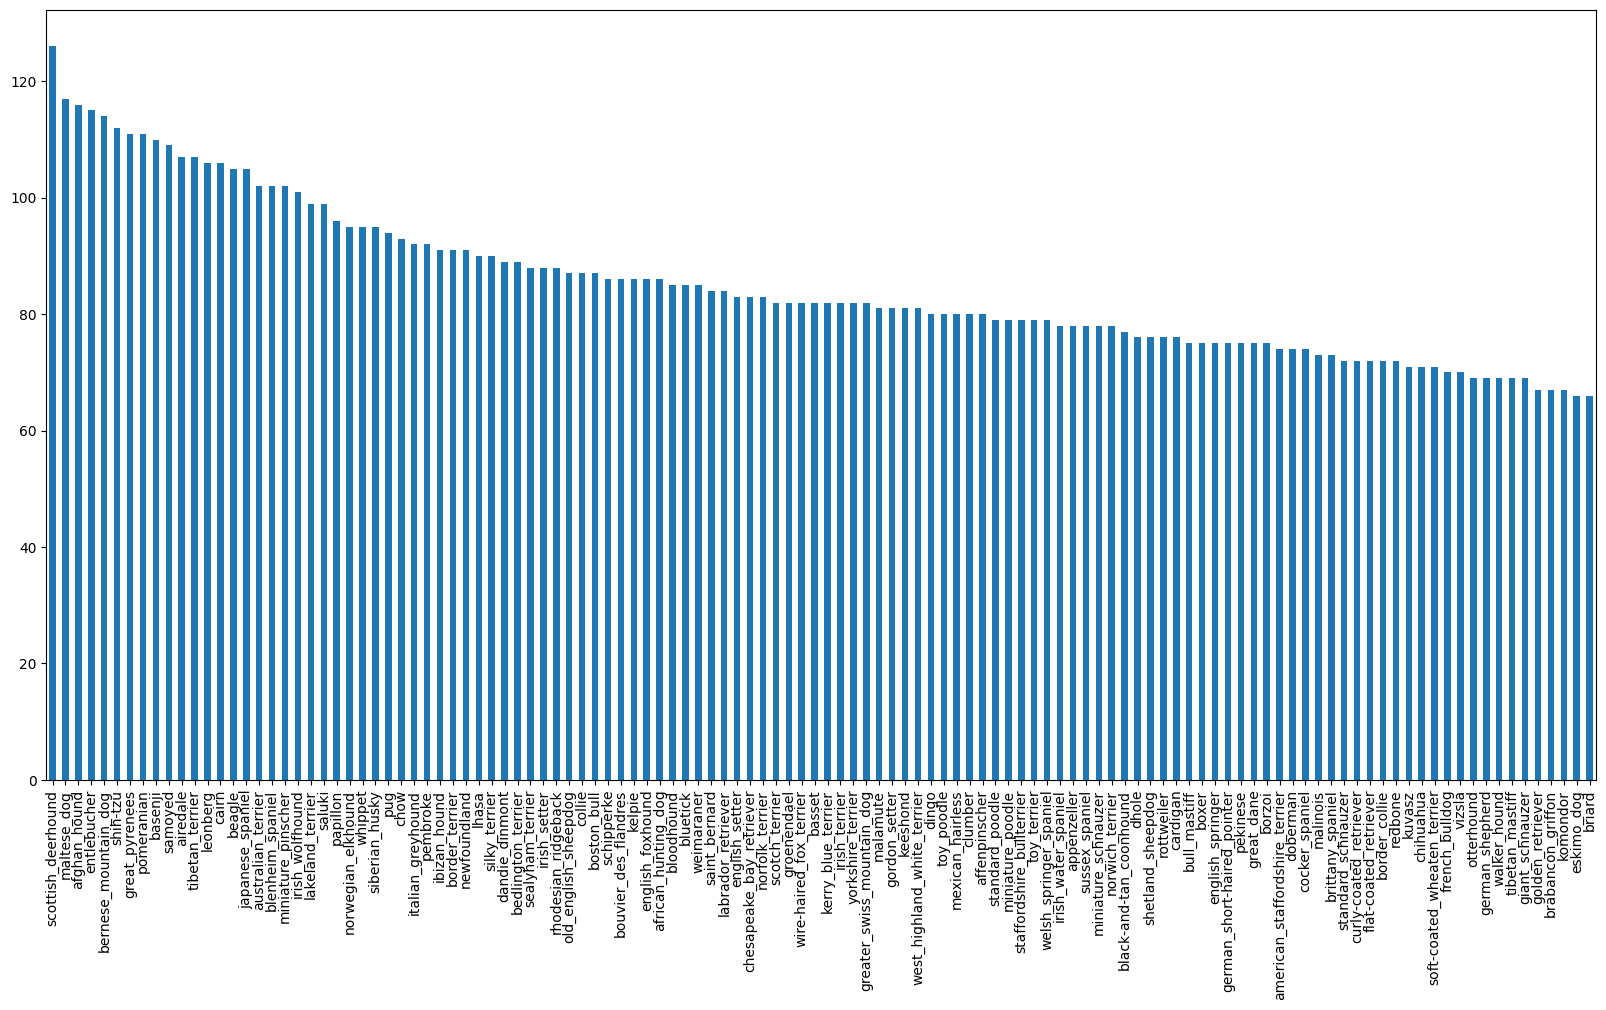

In [5]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))


In [6]:
labels_csv["breed"].value_counts().median()

82.0

In [7]:
#IPython is a command shell for interactive computing
#IPython.display: Create a PNG/JPEG/GIF image object given raw data.
#When this object is returned by an input cell or passed to the display function, it will result in the image being displayed in the frontend.

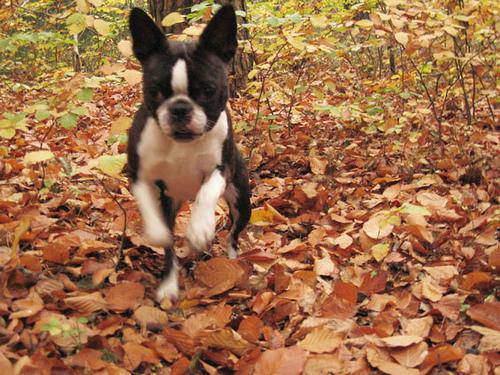

In [8]:
# Let's view an image
from IPython.display import Image 
Image("drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

### Fetching images and their labels

Let's get a list of all of our img file pathnames

In [9]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [10]:
len(labels_csv)

10222

In [11]:
# Create pathnames from image ID's
filenames = ["drive/MyDrive/Dog Vision/train/"+fname for fname in labels_csv["id"]+".jpg"]

# Check first 10
filenames[0:10]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [12]:
filenames[0]

'drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg'

Python os system function allows us to run a command in the Python script, just like if I was running it in my shell. 

In [13]:
import os
#gives the list of files in the specified directory
os.listdir("drive/MyDrive/Dog Vision/train/")[0:10]

['dcc19db6b4e117d5e4f7d1b00fbe3982.jpg',
 'e79cc376c53b8333546437ca6e5b8759.jpg',
 'e073b458a33cbfe9b733764a1246f52e.jpg',
 'e8f36fbe544d5c3329bc9e51606abcef.jpg',
 'dcf58c0dac2664e94f476fdc56aa7ffc.jpg',
 'e748f61d39da506904f531c7732df512.jpg',
 'e81e8496a9826236ee5dfb24960aec6d.jpg',
 'e4a4cb1f4ab166d24cc5215abeb327b9.jpg',
 'e35eb70a03e9f7f190a45a820295a671.jpg',
 'e67eb5ac576a272a62033127bf4e6570.jpg']

In [14]:
# check whether number of file name matches number of actual img files
if len(os.listdir("drive/MyDrive/Dog Vision/train/")) == len(filenames):
  print("Filenames match actual amount of files!!!")
else:
  print("Filenames do not match the actual amount of files, check target directory.")


Filenames match actual amount of files!!!


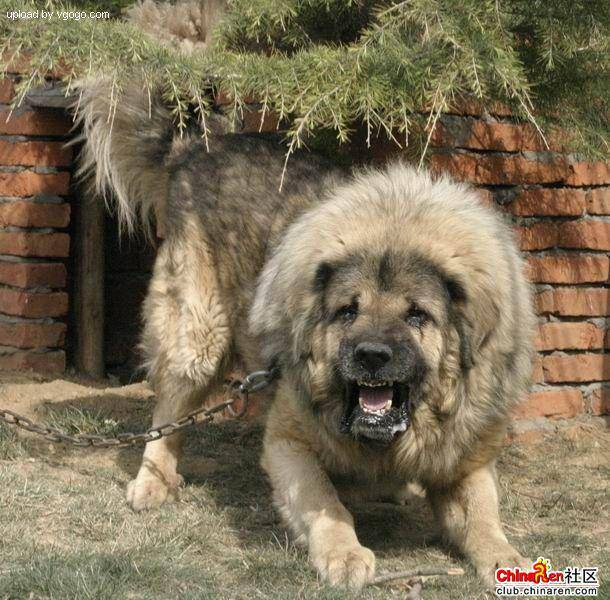

In [15]:
# One more check
Image(filenames[9000])

In [16]:
labels_csv["id"][9000], labels_csv["breed"][9000]

('e20e32bf114141e20a1af854ca4d0ecc', 'tibetan_mastiff')

### Preparing our labels
since we have now got our training image filepaths in a list, let's prepare our labels

In [17]:
import numpy as np
labels = labels_csv["breed"] 
labels = np.array(labels) #converts to numpy array
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [18]:
len(labels)

10222

In [19]:
# See if no. of labels (breed names converted to np array) match the no. of filenames (path id)
if len(labels) == len(filenames):
  print("Matches!!")
else:
  print("does not match")

Matches!!


In [20]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [21]:
# Turn a single label into an array of booleans
print(labels[0])

# comparing the breed number '0' in labels with unique breeds array
labels[0] == unique_breeds #the loc. where label[0] matches, it will be true

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

* We are comparing each breed name(10222) in the labels array with the unique breeds(120) in the unique_breed array.

* so for each label in labels, a boolean array is created

In [22]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [23]:
len(boolean_labels)

10222

In [24]:
# Example: Turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) #index where label occurs in boolean array
print(boolean_labels[0].astype(int)) #there will be a '1' where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [25]:
print(labels[2])
print(boolean_labels[2].argmax())
print(boolean_labels[2].astype(int))

pekinese
85
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set
since we don't have a validation set on kaggle

**validation sets** are used for hyperparameter tuning and are basically created using cross validation technique from the training data set

In [26]:
# Setup X & y variables
X = filenames #predictor variables (i.e. the input features and independent)
y = boolean_labels #corresponding output variable (i.e. the label, depends on X)

In [27]:
X[42]

'drive/MyDrive/Dog Vision/train/011e06760794850c40f23d6426c40774.jpg'

In [28]:
len(filenames)

10222

we're going to sratrt off experimenting with ~1000 images and increase as needed

In [29]:
# set number of imgs to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [30]:
# Let's split our data into train and validation
from sklearn.model_selection import train_test_split


#split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [31]:
# Let's have a geez at the training data
X_train[:5] , y_train[:2]
#filenames, boolean labels

(['drive/MyDrive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/Dog Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/Dog Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, 

## Preprocesing Images(turning images into tensors)

To do this, we are going to write a funcn which is going to do few things:
1. Take an img filepath as input
2. use TF to read the file and save it to a variable `image`
3. Turn our `image` (a jpg) into tensors
4. Resize the image `image` to be a shape of(224,224)
5. Return the modified image

Before we do, Let's see what importing a image looks like

In [32]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape #(height, width, color channel(values bw 0-255))

(257, 350, 3)

In [33]:
# 3, in the above output refers to colour channel(RGB)
# each color h 8 bits and can represent 256 distict values
# 0-255, image.max()=255, image.min()=0
image.max(), image.min()

(255, 0)

In [34]:
image[:2] #the array below is for the color channel in the photo

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [35]:
#turning image to tensor
#we converted it to tensors as it is much faster to run on a GPU and faster to compute
tf.constant(image)[:2] #tf.constant is used to create tensors from tensor like object

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

Now we've seen what an image looks like a Tensor, let's make a function to preprocess them.
1. Take an img filepath as input
2. use TF to read the file and save it to a variable `image`
3. Turn our `image` (a jpg) into tensors
4. Normalize our image (convert color channel values from 0-255 to 0-1)
5. Resize the `image` to be a shape of(224,224)
6. Return the modified image


A **data pipeline** is a series of data processing steps. If the data is not currently loaded into the data platform, then it is ingested at the beginning of the pipeline. Then there are a series of steps in which each step delivers an output that is the input to the next step.

The **input pipeline** is a quick and easy utility provided in tf.dataapi to make complex input pipelines from simple and reusable codes and all in few lines of code. It also allows handling a large amount of data, thus giving low-end machines an advantage in computing them.

It does it by wrapping the data into tf.data.dataset class and performing a series of operations on them called ETL - Extract, Transform, Load.

**tf.io.read_file**
This operation returns a tensor with the entire contents of the input filename. It does not do any parsing, it just returns the contents as they are. Usually, this is the first step in the input pipeline.

**tf.image.decode_jpeg**
Decode a JPEG-encoded image to a uint8 tensor(0-255)

**tf.image.resize**
When training vision models, it is common to resize images to a lower dimension ((224 x 224), (299 x 299), etc.) to allow mini-batch learning and also to keep up the compute limitations. 

In [36]:
#Define image size
IMG_SIZE = 224

#Create a function for preprocessing images
def process_image(image_path):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  #Read in an image file
  image = tf.io.read_file(image_path)
  #Turn the jpeg into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  #Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  #Resize the image to out desired value(244,244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

## Turning our data into batches

why turn our data into batches?
let's say we are trying to process 10,000+ images in one go... they all might not fit into memory.
thus, we do 32 (batch size) images at a time.

In order to use tf effectively, we need our data in the form of Tensor tuples which look like this:
`(image, label)`.

In [37]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  process the image and return a tuple of(image, label).
"""

  image = process_image(image_path) #tensored image
  return image, label

In [38]:
tf.constant(y[42])

<tf.Tensor: shape=(120,), dtype=bool, numpy=
array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])>

**preprocess_image(X[42])**

we pass the index inside X (X[42]), this gives us the path of the image we want to preprocess, the process_image function processes the image and gives us in the required tensor format

**tf.constant(y[42])**

converts the boolean array for each image into tensors

In [39]:
# Demo of the above
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way to turn our data into tuple of tensors in the form: `(image, label)`, let's make a funcn to turn all our data 
(X & y) into batches!

**Batch mapping**

Combining the utility of Dataset.map() with batch mode is very powerful. It allows you to speed up processing, and freely control the size of the generated dataset.

In [40]:
# Define the batch size, being 32 at start
BATCH_SIZE = 32

# Create  a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Create batches of data out of image (X) and label (y) pairs.
  shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches....")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X)) #Only filepaths (no labels), hence the function process img is used
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If a data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), #filepaths
                                              tf.constant(y))) #labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
    
  else:
    print("Creating training data batches...")
    #Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), #filepaths
                                              tf.constant(y))) #labels
    # shuffling pathnames and labels before mapping processed image as,
    # it takes longer to shuffle a full image instead of just a file name.
    data = data.shuffle(buffer_size=len(X)) #shuffling all the training data (buffer size)

    # Create (image, label) tuples (this also turns the image into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [41]:
# Create taining and validation data batches
train_data = create_data_batches((X_train), (y_train))
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [42]:
# Check out the different attribute of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing data batches

Our data is now in batches, however, these can be a little hard to understand, so let's visualize them!

In [43]:
import matplotlib.pyplot as plt

# create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10,10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5,5, i+1) #row, column and plot idx in the fig
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    #because the label array is encoded, we do the function .argmax() to get the index number
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [44]:
y[0] #19 (true in boolean array of y[0])
y[0].argmax()

19

In [45]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

**next(train_data.as_numpy_iterator())**

***As our data is in batch, we need to un-batch it for visualization***

returns an iterator which converts all elements of the dataset to numpy.

**train_data.as_numpy_iterator()**It will take our batch dataset, it will unwind it from a batch and turn it into a numpy iterator.
every time you run this line of code, it always return the next batch of image and labels.(as training data is shuffled)

In [46]:
# next returns the next item from the iterator
train_images, train_labels = next(train_data.as_numpy_iterator())
len(train_images), len(train_labels)

(32, 32)

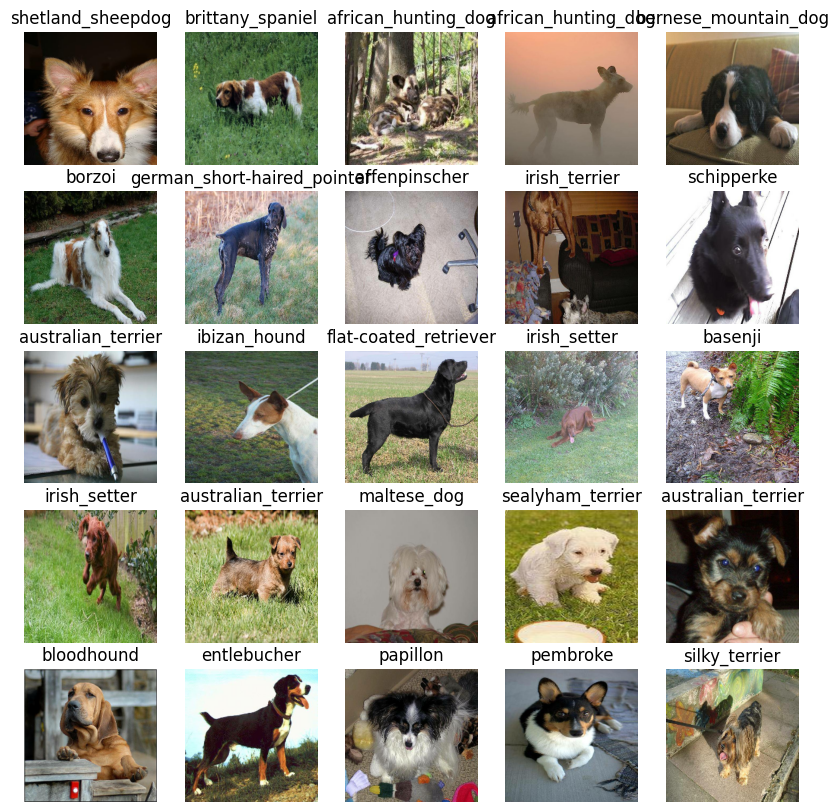

In [47]:
# Now let's visualize our data in a training batch
# Everytime we run this, training batches will get shuffled as done in (create_data_batches) function
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

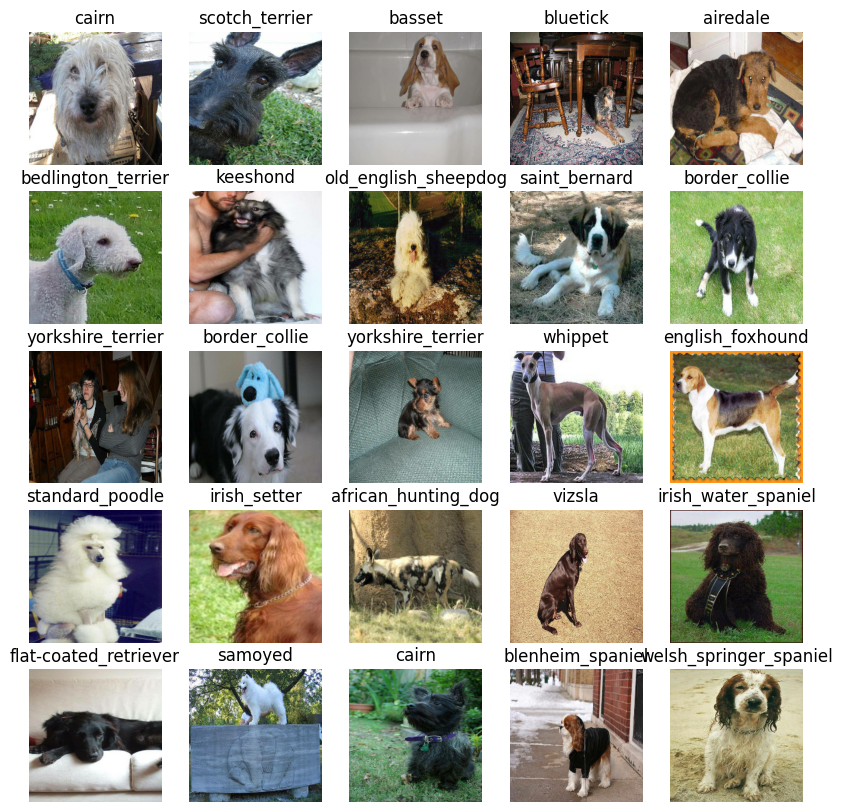

In [48]:
# Now let's visualize our validation set
#validation set will not get shuffled
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model

Before we build a model, there are a few things we need to define:
* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use, from tensorflow hub. (https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5)

In [49]:
IMG_SIZE

224

In [50]:
# setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, color channels

# setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

**TensorFlow Keras**

Keras is the high-level API of TensorFlow 2: an approachable, highly-productive interface for solving machine learning problems, with a focus on modern deep learning. It provides essential abstractions and building blocks for developing and shipping machine learning solutions with high iteration velocity.

**Layers** are the basic building blocks of neural networks in Keras. A layer consists of a tensor-in tensor-out computation function (the layer's call method) and some state, held in TensorFlow variables (the layer's weights).

Now we've got our inputs, outputs and model ready to go.
Let's put them together into a keras deep learning model.

Knowing this let's create a function which:
* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers in a Keras model in a sequential fashion (do this first, then this, then that).
* Compiles the model (says how it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be getting).
* Returns the model.

https://www.tensorflow.org/guide/keras/sequential_model

**model = tf.keras.Sequential**
Linear stack of layers. Takes some sort of input, find patterns in that input and then have some sort of output.


Activation Function helps the neural network to use important information while suppressing irrelevant data points.



* hub.KerasLayer(MODEL_URL) *Layer 1*
creating a keras layer of model_url
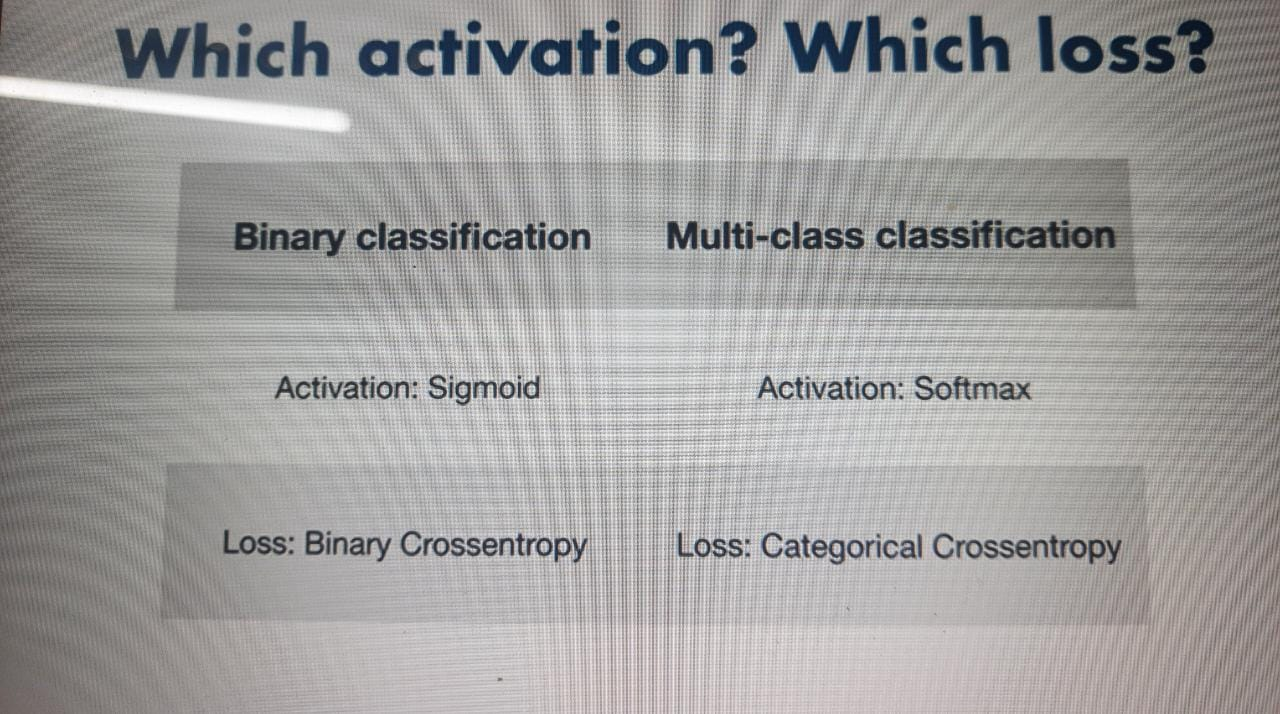

In [51]:
# Create a function that builds a keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup model layers
  model = tf.keras.Sequential([ 
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])
  #After applying softmax, each component will be in the interval(0,1)
  #and the components will add upto 1.
  #(all our o/p b/w 0-1 and the o/p w highest value will be our actual o/p)

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), #loss function:- how well model is guessing (higher the los -> worst the prediction)
      optimizer=tf.keras.optimizers.Adam(), #Function to improve model's guesses
      metrics=["accuracy"] #way of evaluating the guesses after its learning
  )

  # Build the model
  model.build(INPUT_SHAPE)
  
  return model

In [52]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [53]:
outputs = np.ones(shape=(1,1,1280))
outputs

array([[[1., 1., 1., ..., 1., 1., 1.]]])

## Creating callbacks

calbacks are helper functions a model can use during training to do such things as save its progress, check it's progress or stop training early if a model stops improving.

We'll create two callbacks, one for *TensorBoard which helps track our models progress* and *another for early stopping which prevents our model from training for too long* (before it overfits).

### TensorBoard callback

TensorBoard is a tool for providing the measurements and visualizations needed during the machine learning workflow. It enables tracking experiment metrics like loss and accuracy, visualizing the model graph, projecting embeddings to a lower dimensional space, and much more.

To setup a TensorBoard callback we need to do three things:-
1. Load the TensorBoard extension
2. Create a tensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` fnction.
3. Visualize our models training logs with the `%tensorboard` magic function (we'll do this after model training).

In [54]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [55]:
import datetime #for tracking each experiment by trackin dte n tme for each exp

# Create a function to build a tensorboard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs 
  logdir = os.path.join("drive/MyDrive/Dog Vision/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early stopping callback

It helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

In [56]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3
                                                  )
#patience: no. of epochs with no improvement after which training will be stopped.

## Training a model (on subset of data)

Our first model is only going to train on 1000 images, to make sure everything is working.

num of epochs: how many parses of data we'd like our model to do

A parse is equiv. to our model trying to find patterns in each dog img and see which pattern relate to each label.


A 100 epochs will give our model 100 chances to go through the training dataset and figure out the patterns and validating it from there.

In [57]:
 NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, steps:10}

In [58]:
# check to make sure we are still running on a GPU
print("GPU", "available (Yesss!!)" if tf.config.list_physical_devices("GPU") else "not available")

GPU available (Yesss!!)


Let's create a function which trains a model.

* Create a model using `create_model()`
* Setup a TensorBoard callback using `create_tensorboard_callback()`
* call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for (`NUM_EPOCHS`) and the callbacks we'd  like to use 
* Return the model

In [59]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and return
  """
  #create a model
  model = create_model()

  #create new tensorboard session everytime we train a model
  tensorboard = create_tensorboard_callback() #tracks our model's performance

  #Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data, #data batch that contains the img and labels
            epochs=NUM_EPOCHS, #how many times is our model can look at the training data
            validation_data=val_data,
            validation_freq=1, #how often we want to test the patterns that our model has found on our validation set
            callbacks=[tensorboard, early_stopping])
  #Return the fitted model
  return model

* each epoch takes 25 steps for the training data as our training data that is 800 which is divided into batches of 32 each.
so 800/32 = 25.

* if our model is not improving the results in the subsequent epochs, it will eventually stop training


In [60]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 111s 985ms/step - loss: 4.6690 - accuracy: 0.0875 - val_loss: 3.3915 - val_accuracy: 0.2550
Epoch 2/100
25/25 [==============================] - 3s 115ms/step - loss: 1.7081 - accuracy: 0.6625 - val_loss: 2.1306 - val_accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 5s 185ms/step - loss: 0.5963 - accuracy: 0.9325 - val_loss: 1.6087 - val_accuracy: 0.6000
Epoch 4/100
25/25 [==============================] - 3s 115ms/step - loss: 0.2636 - accuracy: 0.9875 - val_loss: 1.4619 - val_accuracy: 0.6100
Epoch 5/100
25/25 [==============================] - 3s 114ms/step - loss: 0.1532 - accuracy: 0.9962 - val_loss: 1.3752 - val_accuracy: 0.6350
Epoch 6/100
25/25 [==============================] - 4s 164ms/step - loss: 0.1027 - accuracy: 0.9987 - val_loss: 1.3370 - val_accuracy: 0.6450
Epoch 7/100
25/25 [============================

Since our model is overfitting, we gotta find ways to prevent model overfitting in deep learning neural networks.

**Note:** Overfitting to begin w is actually good, it means our model is learning.

### Checking the TensorBoard logs

The TensorBoard magic function (`%tensorboard`) will access the logs directory we created earlier and visulaize its contents.

In [61]:
#%tensorboard --logdir drive/MyDrive/Dog\ Vision/logs

## Making and evaluating predictions using a trained model

the predictions array has label prob for each image in the val set, i.e 200 val img and 120 labels.
so for each image, there are 120 different probabilities given.

In [62]:
# make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1) #verbose:- when making predictions so your progress
predictions

7/7 [==============================] - 3s 89ms/step


array([[2.9166699e-03, 9.1579743e-05, 7.4594998e-04, ..., 3.4775271e-04,
        3.6798127e-05, 1.0817660e-03],
       [2.8052209e-03, 6.2319748e-05, 5.9636272e-03, ..., 3.3106800e-04,
        7.5188966e-04, 8.4194158e-05],
       [4.5097295e-06, 1.6845706e-05, 2.1514306e-05, ..., 1.9233907e-05,
        1.3032359e-05, 6.6740566e-04],
       ...,
       [4.3351370e-06, 1.2729241e-05, 1.1949686e-06, ..., 1.3580368e-06,
        2.7730144e-04, 8.4057347e-06],
       [6.5513523e-03, 9.8668225e-04, 1.0148520e-04, ..., 8.6743807e-05,
        1.2693903e-04, 1.2646646e-02],
       [9.3959046e-05, 6.1755654e-06, 9.0721413e-04, ..., 1.9629812e-03,
        7.1514638e-05, 8.3773259e-05]], dtype=float32)

In [63]:
predictions.shape

(200, 120)

In [64]:
# First Prediction
index=42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[2.61053297e-04 1.83030308e-04 1.36756717e-05 1.19111217e-04
 3.34688183e-03 4.27006853e-05 1.92108098e-04 1.48746313e-03
 2.13447143e-03 8.74655992e-02 1.71163192e-05 1.05598820e-05
 3.75288830e-04 5.21942088e-03 6.24980486e-04 3.12451692e-03
 1.07663082e-05 1.55414324e-04 2.88384588e-04 4.68043465e-04
 2.75838647e-05 8.69666284e-04 3.43375286e-04 2.56433032e-05
 1.88778453e-02 1.71144347e-04 1.23861377e-04 5.20826070e-05
 2.58923741e-04 1.56570586e-05 4.47676903e-05 3.63352519e-05
 6.20581268e-05 1.76744252e-05 1.54749741e-05 9.70562178e-05
 2.38885375e-04 2.70121905e-04 2.73230282e-04 1.91791818e-01
 7.44213321e-05 4.64501463e-05 1.74900796e-02 5.32023296e-06
 3.71494854e-04 6.19886850e-05 2.47075332e-05 8.84331239e-04
 8.68761053e-05 8.37239262e-04 1.57073038e-04 1.18466050e-04
 9.12534742e-05 3.30181909e-03 2.08687434e-05 8.86992319e-04
 1.52151215e-05 2.57234715e-05 2.31064594e-04 1.80982301e-04
 8.42144509e-05 1.04044727e-03 1.09161274e-05 1.81722971e-05
 4.68353537e-05 1.040227

 Having the above functionality is great but we want to be able to do it at scale.

 And it would be better if we could see the image the prediction is being made on.

 **Note:** Prediction probabilities are also known as confidence level


In [65]:
# Turn prediction probabilities into their respective label:-
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

'dingo'

In [66]:
 val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

now since our val data is still in a batch, we'll have to unbatch it to make predictions on the validation images and compare those prediction to validation truth labels.

In [67]:
# create function to un-batch a batch dataset

def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors 
  and returns separarte arrays of images and labels.
  """
  images = [] #adds every tensor image to the images list
  labels = [] #dds corresponding label to the labels list
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator(): #A as_numpy_iterator() function returns an iterator which converts all elements of the dataset to numpy. 
    images.append(image) #appending the images from the batch to the image list
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Ubatchifying the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

### Making some important functions for visualizing our model

 Now we've have got ways to get:-
 * prediction labels
 * Validation labels (truth labels)
 * validation images 

now we'll make a function to make these all a bit more visualize.

we'll create a function which:
* Takes an array of prediction probabilities, an array of truth labels and an array of images and integers
* Convert the prediction probabilities to a predicted label.
* Plot the predicted label, its predicted probability, and the target image on a single plot.

In [68]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  view the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image and remove ticks 
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # change the color of the title depending on if the prediction is right or wrong.
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                     np.max(pred_prob)*100,
                                    true_label), color=color)

**Note: ** if the prediction is made right the label will be green.
and if the prediction is made wrong ('cair' 75% 'hound'), it means our model
predicted 'cair' but is actually 'hound'

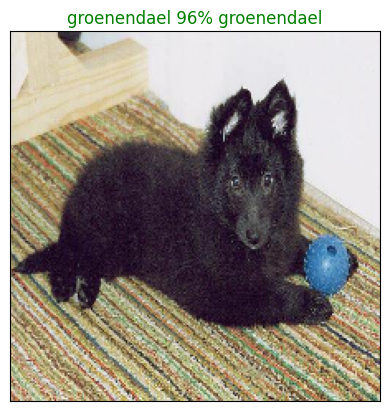

In [69]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images, n=77)

Now we've got one function to visualize our models top prediction, let's make another to view our models top 10 predictions.

This fucntion will:
* Take an input of prediction probabilities array and a ground truth array and an integer.
* Find the prediction using the fucntion `get_pred_label()`
* Find the top 10:
    * Prediction probabilities indexes
    * Prediction probabilities values
    * Prediction labels
* Plot the top 10 prediction probability values and labels, coloring the true label green


In [70]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass


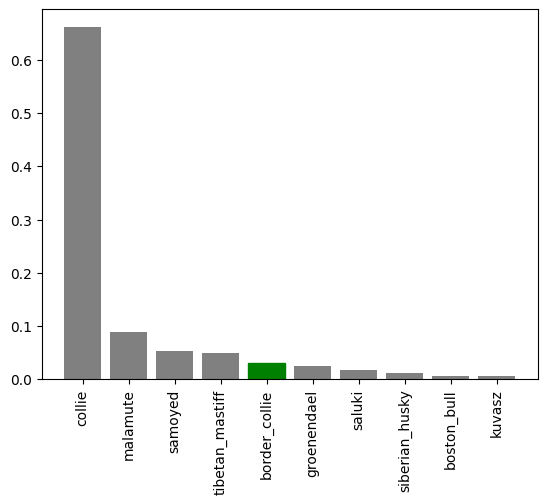

In [71]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

### Combining the `plot pred` and `plot pred confidence` that we've got

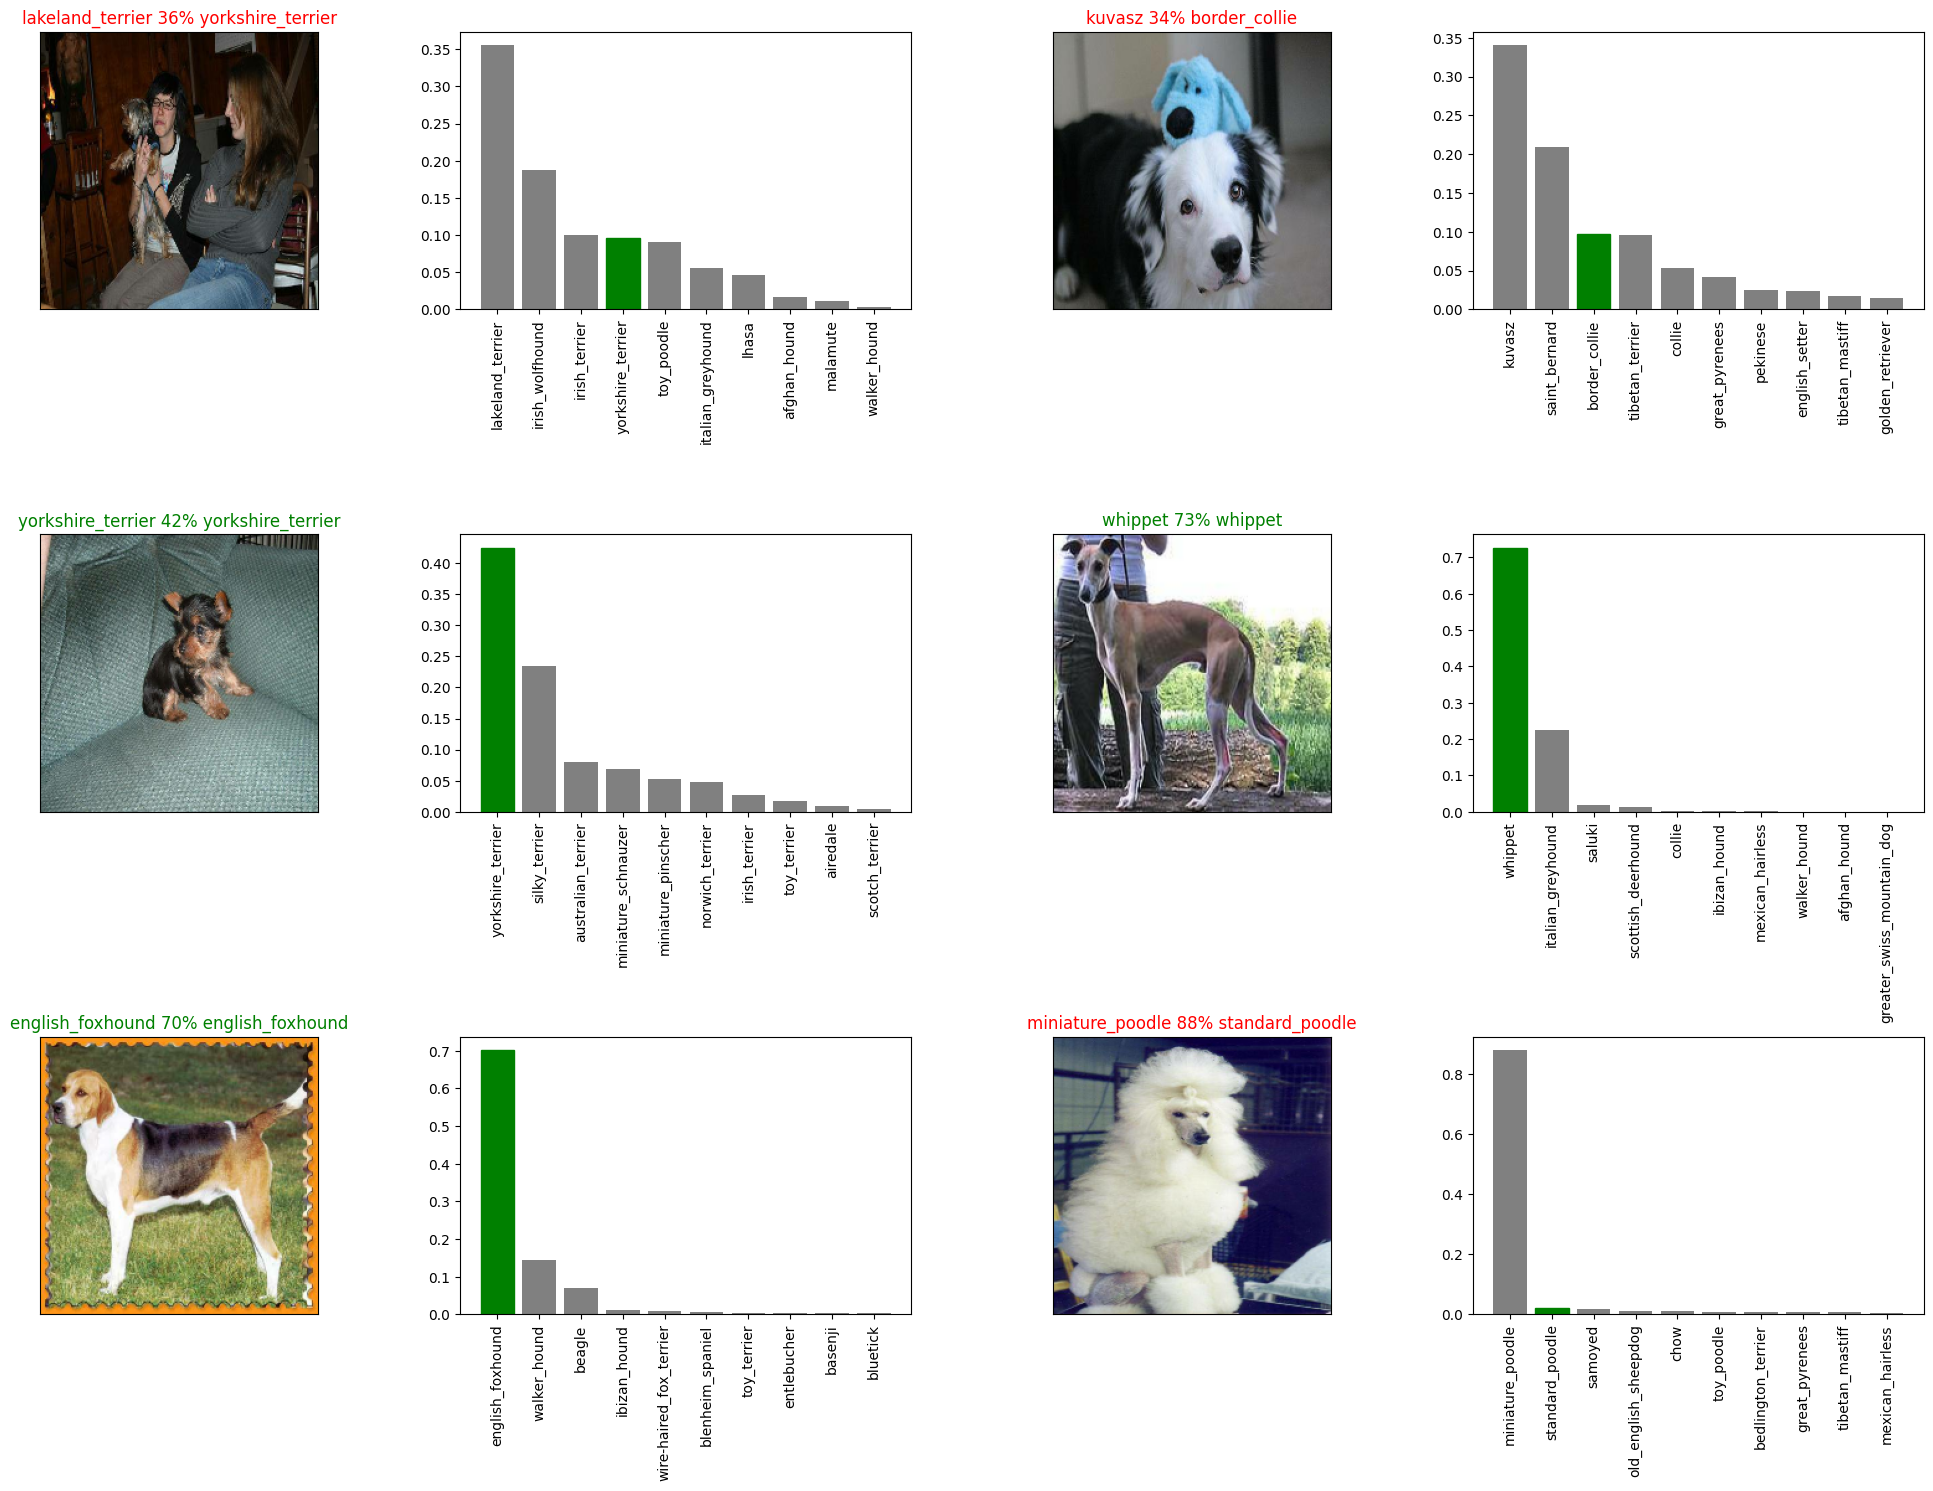

In [72]:
# Let's check out a few predictions and their different values
i_multiplier = 10 #the i_multiplier is responsible for giving us 10 images(ex. 0: img 0-9, 10: img 10-19)
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and reloading a trained model

In [73]:
# Create a function to save a model
def save_model(model, suffix=None): #The Save with Suffix command saves an image or the members of an Image Set with a suffix added to the file names. 
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/MyDrive/Dog Vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-"+ suffix + ".h5" # save format of model
  print(f"saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [74]:
# Create a function to load a trained model
def load_model(model_path):
   """
   Loads a saved model from a specified path.
   """
   print(f"Loading saved model from: {model_path}")
   model = tf.keras.models.load_model(model_path,
                                      custom_objects = {"KerasLayer":hub.KerasLayer})
   return model

Now we've got funcns to save and load a trained model, let's make sure they work!

In [75]:
# Save our model that is trained on a 1000 images
save_model(model, suffix="1000-images-mobilnetv2-Adam")

saving model to: drive/MyDrive/Dog Vision/models/20230521-17321684690363-1000-images-mobilnetv2-Adam.h5...


'drive/MyDrive/Dog Vision/models/20230521-17321684690363-1000-images-mobilnetv2-Adam.h5'

In [76]:
# Loading a model that was trained on 1000 imgs
loaded_1000_image_model = load_model("/content/drive/MyDrive/Dog Vision/models/20230521-12491684673343-1000-images-mobilnetv2-Adam.h5") 

Loading saved model from: /content/drive/MyDrive/Dog Vision/models/20230521-12491684673343-1000-images-mobilnetv2-Adam.h5


In [77]:
# Evaluating the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 75ms/step - loss: 1.1950 - accuracy: 0.6850


[1.1949809789657593, 0.6850000023841858]

In [78]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 87ms/step - loss: 1.2357 - accuracy: 0.6950


[1.23567533493042, 0.6949999928474426]

## Training our Model on full dataset

In [79]:
len(X), len(y)

(10222, 10222)

In [80]:
len(X_train), len(X_val)

(800, 200)

In [81]:
# Create a data batch with the full data set
full_data = create_data_batches(X, y)

Creating training data batches...


In [82]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [83]:
# Create a model for full model
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [84]:
# create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                              patience=3)

**Note:** running the cell below will take sometime, maybe upto 30mins for the first epoch because the GPU has to load the images to the memory.


In [85]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 37s 104ms/step - loss: 1.3269 - accuracy: 0.6768
Epoch 2/100
320/320 [==============================] - 32s 101ms/step - loss: 0.4024 - accuracy: 0.8811
Epoch 3/100
320/320 [==============================] - 32s 101ms/step - loss: 0.2379 - accuracy: 0.9359
Epoch 4/100
320/320 [==============================] - 33s 102ms/step - loss: 0.1546 - accuracy: 0.9616
Epoch 5/100
320/320 [==============================] - 33s 101ms/step - loss: 0.1054 - accuracy: 0.9787
Epoch 6/100
320/320 [==============================] - 32s 100ms/step - loss: 0.0779 - accuracy: 0.9857
Epoch 7/100
320/320 [==============================] - 32s 100ms/step - loss: 0.0590 - accuracy: 0.9917
Epoch 8/100
320/320 [==============================] - 32s 100ms/step - loss: 0.0459 - accuracy: 0.9952
Epoch 9/100
320/320 [==============================] - 33s 103ms/step - loss: 0.0369 - accuracy: 0.9969
Epoch 10/100
320/320 [==============================] - 32s 101m

In [86]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

saving model to: drive/MyDrive/Dog Vision/models/20230521-17431684691009-full-image-set-mobilenetv2-Adam.h5...


'drive/MyDrive/Dog Vision/models/20230521-17431684691009-full-image-set-mobilenetv2-Adam.h5'

In [87]:
# Load the full model
loaded_full_model = load_model("drive/MyDrive/Dog Vision/models/20230521-16071684685238-full-image-set-mobilenetv2-Adam.h5")

Loading saved model from: drive/MyDrive/Dog Vision/models/20230521-16071684685238-full-image-set-mobilenetv2-Adam.h5


##  Making predictions on the test dataset

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we created create_data_batches() earlier which can take a list of filenames as input and conver them into Tensor batches.

To make predictions on the test data, we'll:

* Get the test image filenames. ✅
* Convert the filenames into test data batches using create_data_batches() and setting the test_data parameter to True (since the test data doesn't have labels). ✅
* Make a predictions array by passing the test batches to the predict() method called on our model.

In [88]:
# Load test image filenames
test_path = "drive/My Drive/Dog Vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/My Drive/Dog Vision/test/e34654831e228ad3ac1d0c463e70caf6.jpg',
 'drive/My Drive/Dog Vision/test/e65d6492c026c925660d80543664b8a7.jpg',
 'drive/My Drive/Dog Vision/test/deb66780609abfef7f5048df02149839.jpg',
 'drive/My Drive/Dog Vision/test/e55534e27f92b4c8177ed2beb1cbba7b.jpg',
 'drive/My Drive/Dog Vision/test/df2a003a0b1a216effd806f03f703859.jpg',
 'drive/My Drive/Dog Vision/test/e3a43510b5f90bfb9fb050c77cabb079.jpg',
 'drive/My Drive/Dog Vision/test/dd3ac0ab0e9328f1f4c1692947c17c09.jpg',
 'drive/My Drive/Dog Vision/test/e443bb594a89ab5fa1266748d6b41648.jpg',
 'drive/My Drive/Dog Vision/test/e23ad195d88975333bbcde7dce5faf01.jpg',
 'drive/My Drive/Dog Vision/test/e487437a727b3e4f0b919c878d39ae6e.jpg']

In [89]:
len(test_filenames)

10357

In [90]:
 # Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches....


In [91]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

**Note:** Calling predict() on our full model and passing it the test data batch will take a long time to run (about a ~1hr). This is because we have to process ~10,000+ images and get our model to find patterns in those images and generate predictions based on what its learned in the training dataset.

In [92]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 281s 857ms/step


In [94]:
test_predictions[:10]

array([[1.24163180e-10, 8.23039813e-12, 1.13775078e-09, ...,
        9.79473407e-06, 1.24121167e-08, 2.35785308e-10],
       [9.67530153e-11, 1.17865035e-07, 8.28597149e-06, ...,
        2.95939335e-05, 3.40787984e-08, 1.91061833e-09],
       [1.28863164e-07, 4.71097665e-05, 3.41428006e-08, ...,
        2.88137206e-04, 3.93283088e-04, 1.28587749e-06],
       ...,
       [1.14239018e-08, 4.26931365e-05, 4.59365296e-10, ...,
        7.61860122e-07, 1.43942566e-11, 3.92745142e-10],
       [1.60475437e-08, 5.19964916e-09, 6.09487894e-12, ...,
        2.80529679e-11, 7.92499122e-10, 1.41369414e-12],
       [9.99985218e-01, 7.10289726e-12, 4.91034192e-11, ...,
        8.37411940e-14, 5.17542617e-07, 6.69973799e-10]], dtype=float32)

In [95]:
test_predictions.shape

(10357, 120)

## Preparing test dataset predictions for kaggle
our models prediction probaiblity outputs in a DataFrame with an ID and a column for each different dog breed. https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

To get the data in this format, we'll:
* Create a pandas DataFrame with an ID column as well as a column for each dog breed.
* Add data to the ID column by extracting the test image ID's from their filepaths.
* Add data (the prediction probabilites) to each of the dog breed columns.
* Export the DataFrame as a CSV to submit it to Kaggle.

In [96]:
# Create a pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [97]:
# Append test image ID's to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids

In [98]:
preds_df.head()

id affenpinscher afghan_hound  \
0  e34654831e228ad3ac1d0c463e70caf6           NaN          NaN   
1  e65d6492c026c925660d80543664b8a7           NaN          NaN   
2  deb66780609abfef7f5048df02149839           NaN          NaN   
3  e55534e27f92b4c8177ed2beb1cbba7b           NaN          NaN   
4  df2a003a0b1a216effd806f03f703859           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [99]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  \
0  e34654831e228ad3ac1d0c463e70caf6   1.241632e-10  8.230398e-12   
1  e65d6492c026c925660d80543664b8a7   9.675302e-11  1.178650e-07   
2  deb66780609abfef7f5048df02149839   1.288632e-07  4.710977e-05   
3  e55534e27f92b4c8177ed2beb1cbba7b   1.604896e-09  3.432509e-09   
4  df2a003a0b1a216effd806f03f703859   3.844220e-10  1.706457e-05   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         1.137751e-09  8.340471e-11                    9.849857e-01   
1         8.285971e-06  5.111759e-07                    3.659573e-07   
2         3.414280e-08  1.209781e-08                    2.336859e-06   
3         7.092590e-10  2.014974e-07                    3.187869e-10   
4         6.317568e-09  2.297783e-07                    2.303946e-10   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  2.738265e-09        3.118943e-07  3.392676e-07  1.063484e-09  ...   
1  3.494291e-07        3.575046e-08  3.431383e-10  9.553070e-06  ...   
2  1.131547e-10        9.795182e-09  3.336217e-09  1.423156e-08  ...   
3  2.233663e-08        3.707687e-08  1.080307e-09  1.279899e-11  ...   
4  3.827439e-05        4.554540e-10  4.383963e-09  6.135099e-07  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  2.034560e-07  5.113035e-11  1.672156e-07  9.112307e-08  7.258167e-11   
1  9.256968e-09  1.374945e-08  3.000638e-07  3.589336e-06  5.346285e-08   
2  1.955472e-03  2.465366e-08  7.510636e-07  8.928412e-07  2.805471e-05   
3  1.516181e-10  2.232439e-09  7.510987e-13  3.036511e-11  7.372061e-10   
4  5.386343e-09  8.642692e-12  2.099323e-07  4.034212e-07  1.778445e-07   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            8.295686e-10                 1.374307e-08  9.794734e-06   
1            1.741969e-03                 2.601873e-07  2.959393e-05   
2            7.758873e-04                 2.194000e-04  2.881372e-04   
3            1.390708e-09                 6.758187e-10  2.962820e-09   
4            5.814613e-09                 1.260198e-08  3.143698e-08   

   wire-haired_fox_terrier  yorkshire_terrier  
0             1.241212e-08       2.357853e-10  
1             3.407880e-08       1.910618e-09  
2             3.932831e-04       1.285877e-06  
3             9.651311e-07       1.269683e-06  
4             1.305283e-10       7.991834e-10  

[5 rows x 121 columns]

In [100]:
# Save our predictions dataframe to CSV for submission to Kaggle
preds_df.to_csv("drive/My Drive/Dog Vision/full_model_predictions_submission_1_mobilenetV2.csv",
                index=False)

## Checking our model predictions when given custom images

To make predictions on custom images, we'll:

* Get the filepaths of our own images.
* Turn the filepaths into data batches using create_data_batches(). And since our custom images won't have labels, we set the test_data parameter to True.
* Pass the custom image data batch to our model's predict() method.
* Convert the prediction output probabilities to predictions labels.
* Compare the predicted labels to the custom images.

In [116]:
custom_path = "drive/MyDrive/Dog Vision/my-dog-photos/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [117]:
custom_image_paths

['drive/MyDrive/Dog Vision/my-dog-photos/dog-img1.jpeg',
 'drive/MyDrive/Dog Vision/my-dog-photos/dog-img3.jpeg',
 'drive/MyDrive/Dog Vision/my-dog-photos/dog-img2.jpeg']

In [118]:
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data


Creating test data batches....


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [119]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 1s 575ms/step


In [120]:
custom_preds.shape

(3, 120)

In [121]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['cairn', 'scotch_terrier', 'malamute']

In [122]:
# Get custom images (our unbatchify() function won't work since there aren't labels... maybe we could fix this later)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

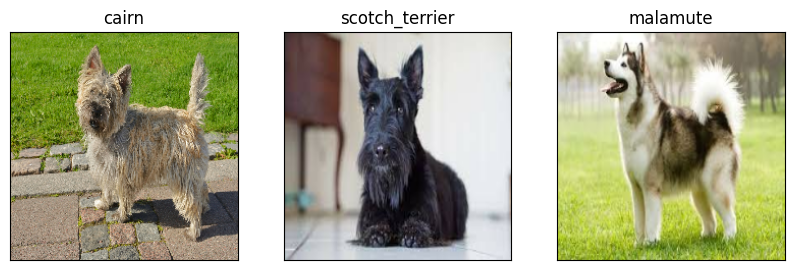

In [123]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)